# Statistics and Data Science 1 (Python) Final Exam Project
## Group: BDA - 2208
## Prepared by: Damenova Dana, Abdykarimov Amir, Daribek Adilet



## 1. Introduction

 This project is dedicated to videogame sales in 2024 found on kaggle. It contains information about over 64'000 games. We decided to pick this topic, because we personally find this topic interesting and also thought that it is a good representative dataset in terms of its size (over 64'000 rows and 14 columns) that can be used for applying Machine learning in case we will be able to do so. <br>
  In this project we want to plot graphs to visualize sales data relevant in 2024, identify which games are popular in each region, the most popular games of the past decade, which genre receives best critic scores and other information about videogame sales.

## 2. Data description

In [1]:
import pandas as pd

In [2]:
games = pd.read_csv('myChart.csv')

#### First, let's see the size and columns present in the dataframe that we uploaded and see top 5 entries to get a better understanding of every column's meaning and purpose

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [4]:
games.head(5)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


As we can see, there are 64016 rows and 14 columns. <br> 
Explanation of the columns:  (taken from https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024/data)
1) img is a column containing the uri to the image at vgchartz.com (type: str) <br>
2) Game title (type: str) <br>
3) console is showing one of the consoles on which the game was released. There can be multiple consoles for one game and they will appear in different rows and have their own sales and critic_scores. (type: str)<br>
4) The genre of the game (Action, Shooter, Horror etc) (type: str) <br>
5) Publisher - the company that released the game (type: str) <br>
6) Developer - Developer of the game (type: str)
7) critic_score - average critic score out of 10 (type: float) <br> 
8) Total_sales - Global sales of copies in millions. (type: float) <br>
9) na_sales - North American sales of copies in millions. (type: float) <br> 
10) jp_sales - Japanese sales of copies in millions. (type: float) <br> 
11) pal_sales - Europe/Africa sales of copies in millions. (type: float) <br> 
12) other_sales - Other sales of copies in millions. (type: float) <br>
13) release_date - Date of the game released (type: datetime) <br> 
14) last_update - Date the data was last updated. (type: datetime) <br>

## Research questions
1. Plot a graph showing the top-10 games with most total sales since 2014 <br>
2. Show which genres are the most popular in each region (total, north america, japan, europe and africa, other regions) <br> 
3.  Analyze which games did people prefer each year by score and sales and see whether the games with highest scores are sold the most <br> 
4. Explore the previous question further and see whether there is a correlation between critic scores and total sales on a scatter plot <br>
5. How has the popularity of various gaming platforms developed and which platforms dominate the market in terms of sales? <br>
6. How does the release date of the game affect sales?

## Data preparation

To perform data cleaning we have to see how many Null columns are there in every column and think whether we should try to fill those values or drop the columns or rows

In [5]:
games.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

We can see that out of 64'016 rows, critic_score, na_sales and jp_sales are the columns with the most number of missing values. Although, we can't simply drop these columns since we are planning to analyze data by regions, so na_sales and jp_sales are crucial. We can later create separate dataframes for each region, dropping rows that don't contain information about specific region. Nontheless, since all of our research questions require total_sales column to be present, we decided to drop all rows that don't have total_sales.
img and last_update will also be dropped since they aren't significant for our research.

In [6]:
games.dropna(subset=["total_sales"], inplace = True)
games.drop(columns =["img", "last_update"], inplace=True)
print("New shape of the dataframe is: ", games.shape)
print(games.isna().sum())

New shape of the dataframe is:  (18922, 12)
title               0
console             0
genre               0
publisher           0
developer           4
critic_score    14796
total_sales         0
na_sales         6285
jp_sales        12196
pal_sales        6098
other_sales      3794
release_date       90
dtype: int64


Now we are left with 18922 entries, there may be additional cleaning for specific questions furtherly. 

## 5. Data analysis and visualisation

### 5.1 Plot a graph showing the top-10 games games with most sales since 2014

For finding the top-10 games with most sales, we will be finding the most popular games released in every year since 2014 by total sales. However we do not have data about games starting from 2021.

In [7]:
games['release_date'] = pd.to_datetime(games['release_date'], errors='coerce')

top_games = games[games['release_date'].dt.year >= 2014] 
top_games = top_games.groupby('title')['total_sales'].sum().nlargest(10)  
print(top_games)

title
Grand Theft Auto V                28.11
Call of Duty: Black Ops 3         26.72
Minecraft                         24.01
Call of Duty: Advanced Warfare    21.78
Call of Duty: WWII                19.82
Red Dead Redemption 2             19.71
FIFA 15                           18.03
FIFA 17                           17.02
FIFA 18                           16.92
FIFA 16                           15.82
Name: total_sales, dtype: float64


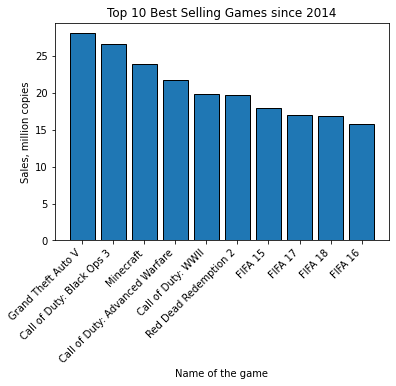

In [8]:
import matplotlib.pyplot as plt

plt.bar(top_games.index, top_games.values, edgecolor='black')

plt.xlabel('Name of the game')
plt.ylabel('Sales, million copies')
plt.title('Top 10 Best Selling Games since 2014')

plt.xticks(rotation=45, ha='right')

plt.show()

The most popular game is GTA V with over 25 million copies sold. Call of duty and FIFA can be considered to be the most popular franchises, since 3 and 4 games of series respectively made it to top-10 best selling games

### 5.2 Show which genres are the most popular in each region (total, north america, japan, europe and africa, other regions)

Firstly, we will group the data by the 'genre' column and then we calculate the sum of 'sales' for each genre. And then with nlargest(5) method we select the top 5 genres with the highest total sales.

In [9]:
top_na_genres = games.groupby('genre')['na_sales'].sum().nlargest(5)
top_jp_genres = games.groupby('genre')['jp_sales'].sum().nlargest(5)
top_pal_genres = games.groupby('genre')['pal_sales'].sum().nlargest(5)
top_other_genres = games.groupby('genre')['other_sales'].sum().nlargest(5)

print("Top 5 Popular Genres in NA:")
print(top_na_genres)

print("\nTop 5 popular genres in Japan:")
print(top_jp_genres)

print("\nTop 5 popular genres in PAL:")
print(top_pal_genres)

print("\nTop 5 popular genres in other regions:")
print(top_other_genres)

Top 5 Popular Genres in NA:
genre
Sports     607.47
Action     589.69
Shooter    528.27
Misc       295.66
Racing     269.72
Name: na_sales, dtype: float64

Top 5 popular genres in Japan:
genre
Role-Playing    130.56
Sports          109.27
Action           80.30
Fighting         58.61
Misc             56.24
Name: jp_sales, dtype: float64

Top 5 popular genres in PAL:
genre
Action     342.52
Sports     341.92
Shooter    324.74
Racing     179.14
Misc       146.71
Name: pal_sales, dtype: float64

Top 5 popular genres in other regions:
genre
Sports     128.19
Action     112.41
Shooter    108.43
Misc        58.52
Racing      56.44
Name: other_sales, dtype: float64


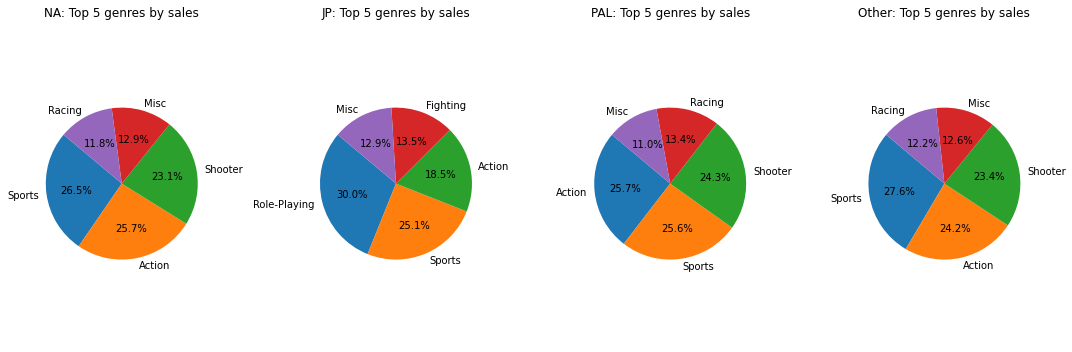

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.pie(top_na_genres, labels=top_na_genres.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('NA: Top 5 genres by sales')

plt.subplot(1, 4, 2)
plt.pie(top_jp_genres, labels=top_jp_genres.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('JP: Top 5 genres by sales')

plt.subplot(1, 4, 3)
plt.pie(top_pal_genres, labels=top_pal_genres.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('PAL: Top 5 genres by sales')

plt.subplot(1, 4, 4)
plt.pie(top_other_genres, labels=top_other_genres.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Other: Top 5 genres by sales')

plt.tight_layout()
plt.show()

We can make a conclusion that sports are popular in every region, making it to either top-1 or top-2 in every given region. Action is also amonst the popular game genres, since it makes to top-3 in every region as well. Shooter is either top-2 or top-3 genre in every region except for Japan and doesn't even make it to top-5 in this region. What's also interesting about Japanese region, they are the only ones who prefer role-playing games, it being the top-1 genre, while it doesn't make it to top-5 in any other region.

### 5.3 Analyze which games did people prefer each year by score and sales and see whether the games with highest scores are sold the most

This time instead of analyzing the most popular games with most sales in total, we will be finding the most popular games released in every year by score and then by total sales.

In [29]:
top_year_games = games[games['release_date'].dt.year >= 2014]
top_year_games = top_year_games.groupby([games['release_date'].dt.year, 'title'])['total_sales'].sum().reset_index(name ='total_sales')
top_year_games = top_year_games.loc[top_year_games.groupby('release_date')['total_sales'].idxmax()]
top_year_games

,release_date,title,total_sales
118,2014.0,Grand Theft Auto V,28.11
411,2015.0,Call of Duty: Black Ops 3,26.72
869,2016.0,FIFA 17,17.02
1220,2017.0,Call of Duty: WWII,19.82
1915,2018.0,Red Dead Redemption 2,19.71
2071,2019.0,Yokai Watch 3: Sukiyaki,0.81
2082,2020.0,Final Fantasy Type-0,0.81


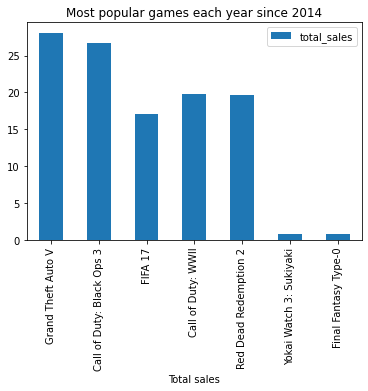

In [12]:
ax = top_year_games.plot.bar(x="title", y="total_sales")
ax.set_title("Most popular games each year since 2014")
ax.set_xlabel("Titles")
ax.set_xlabel("Total sales")
plt.show()

Now, moving on to critic scores

In [13]:
top_year_games_critic = games[games['release_date'].dt.year >= 2014]
top_year_games_critic = top_year_games_critic.groupby([games['release_date'].dt.year, 'title'])['critic_score'].mean().reset_index(name ='critics')
top_year_games_critic = top_year_games_critic.loc[top_year_games_critic.groupby('release_date')['critics'].idxmax()]
print(top_year_games_critic)

      release_date                                           title   critics
207         2014.0                                       Minecraft  9.400000
481         2015.0               Final Fantasy X / X-2 HD Remaster  9.300000
805         2016.0                                   Battlefield 1  9.166667
1579        2017.0                                       Undertale  9.700000
1915        2018.0                           Red Dead Redemption 2  9.800000
2067        2019.0  The Legend of Heroes: Trails of Cold Steel III  7.000000
2093        2020.0                                   Ridge Racer 2  7.500000


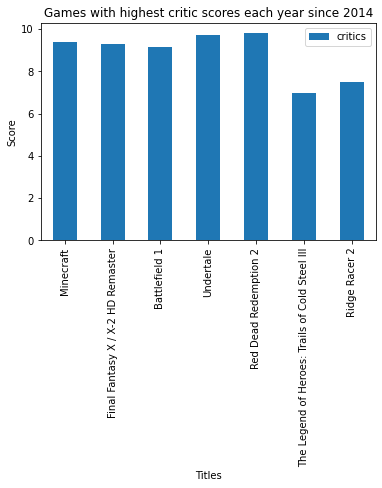

In [14]:
ax = top_year_games_critic.plot.bar(x="title", y="critics")
ax.set_title("Games with highest critic scores each year since 2014")
ax.set_xlabel("Titles")
ax.set_ylabel("Score")
plt.show()

Turns out, there actually is an occasion of the game with the highest score being also the one with highest total sales. It's Red Dead Redemption 2, that scored 9.8 and 19.71 million copies of it were sold in total. Otherwise, there were no matches. 

### 5.4 Explore the previous question further and see whether there is a correlation between critic scores and total sales on a plot

We want to find a correlation between critic scores and total sales for games, for that purpose we should first do data cleaning and drop rows that don't have critic_score. 

First, let's prepare the data and create correlation data frame that contains rows that have critic_score and only "title", "critic_score", "total_sales" columns. Also, we decided to take one specific year for the analysis to exclude bias of older games having more total_sales and decided to choose year 2010 since it had most entries that would also have critic_score.

In [15]:
correlation = games.dropna(subset="critic_score")
correlation = correlation[correlation["release_date"].dt.year==2010]
correlation = correlation[correlation["total_sales"]>0]
correlation = correlation[["title", "critic_score", "total_sales"]]
correlation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 6 to 17287
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         359 non-null    object 
 1   critic_score  359 non-null    float64
 2   total_sales   359 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.2+ KB


Now, let's try drawing a best fit line with the data given. Since there are 4126 entries, we will be using only 500 entries to see the best fit line well.

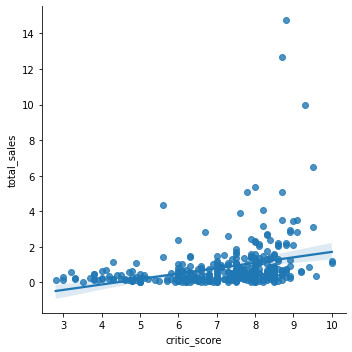

In [16]:
import seaborn as sns
sns.lmplot(x="critic_score", y="total_sales", data=correlation); #regression model

We can't say that there is a strong correlation looking at a graph, let's find pearson's r coefficient to check the correlation

In [17]:
import numpy as np 
r = np.corrcoef(correlation["critic_score"], correlation["total_sales"])
r

array([[1.       , 0.3057507],
       [0.3057507, 1.       ]])

We see that there is a weak correlation with the data in the current form, only 0.3. What will happen if we get rid of the outliers? Let's draw a boxplot to see how much outliers are there

<Axes: ylabel='total_sales'>

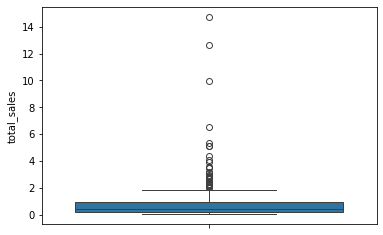

In [18]:
sns.boxplot(correlation["total_sales"])

There are outliers that have more than 2 million total_sales, we can use interquartile range to exclude them and then drop these values

In [19]:
Q1 = correlation["total_sales"].quantile(0.25)
Q3 =  correlation["total_sales"].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = correlation[( correlation["total_sales"] < Q1 - threshold * IQR) | ( correlation["total_sales"] > Q3 + threshold * IQR)]
correlation = correlation.drop(outliers.index)

Now that we got rid of the outliers, let's try finding correlation agian

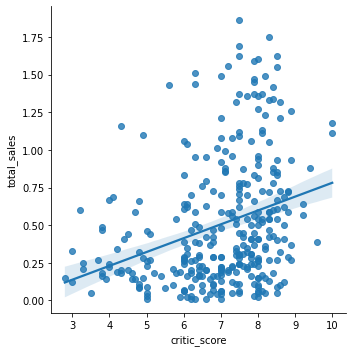

In [20]:
sns.lmplot(x="critic_score", y="total_sales", data=correlation)

In [21]:
import numpy as np 
r = np.corrcoef(correlation["critic_score"], correlation["total_sales"])
r

array([[1.        , 0.30654389],
       [0.30654389, 1.        ]])

In [22]:
import scipy 
print(scipy.stats.spearmanr(correlation["critic_score"], correlation["total_sales"])[0],
      scipy.stats.kendalltau(correlation["critic_score"], correlation["total_sales"])[0])

0.33792778536183166 0.22860963396236408


Even with outliers removed, the correlation is still equal to 0.31 and rose insignificantly. To double-check, we also found spearman and kendall coefficients, which are equal to 0.38 and 0.23 respectively. We can conclude that critic score and total sales have a weak correlation, so neither higher scores neccesserily mean higher sales, nor a low score neccesserily leads to low saling results. 

### 5.5 How has the popularity of various gaming platforms developed and which platforms dominate the market in terms of sales?

We will represent number of every gaming platform using line chart to visualise how did the popularity of each console with time. First, we will group by release date and console, apply size and unstack

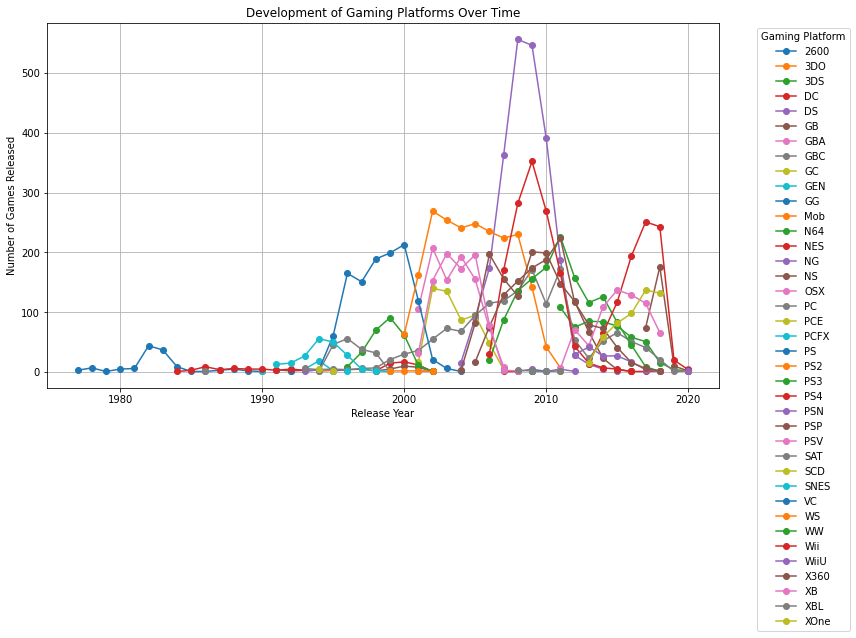

In [25]:
platform_count_over_time = games.groupby([games['release_date'].dt.year, 'console']).size().unstack()
plt.figure(figsize=(12, 8))
for platform in platform_count_over_time.columns:
    plt.plot(platform_count_over_time.index, platform_count_over_time[platform], marker='o', label=platform)
plt.title('Development of Gaming Platforms Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Gaming Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

This graph allows us to see how the number of released games for each gaming platform has changed over time. We can identify periods when certain platforms were particularly active in releasing games, as well as determine intervals when activity was lower.

C:\Users\user\AppData\Local\Temp\ipykernel_5464\1219132303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_total_sales.values, y=platform_total_sales.index, palette='muted')


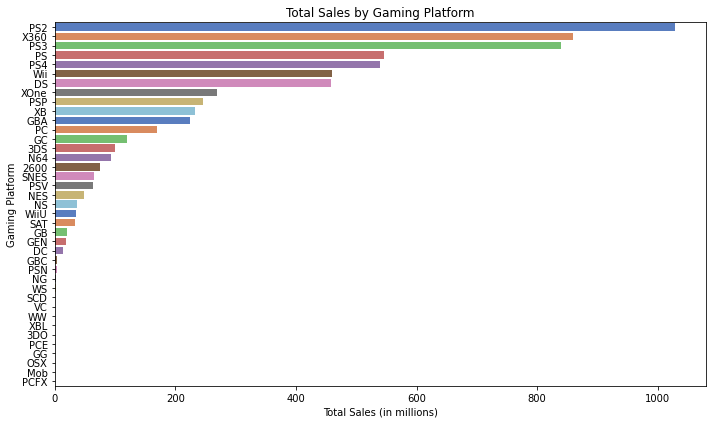

In [26]:
platform_total_sales = games.groupby('console')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_total_sales.values, y=platform_total_sales.index, palette='muted')
plt.title('Total Sales by Gaming Platform')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Gaming Platform')
plt.tight_layout()
plt.show()


Sony's PlayStation brand consistently appears at the top, indicating strong brand loyalty and successful market strategies across different generations. The close competition between Xbox 360 and PS3, and the subsequent strong performance of PS4, illustrate the intense rivalry in the console market and the cyclical nature of market leadership.

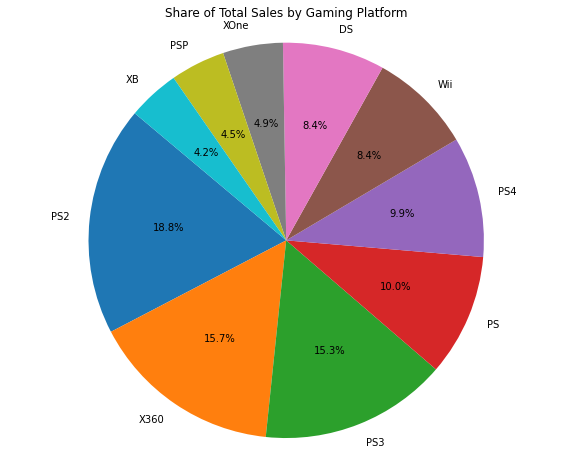

In [27]:
total_sales_all_platforms = games['total_sales'].sum()

platform_sales = games.groupby('console')['total_sales'].sum().sort_values(ascending=False)

platform_sales_share = (platform_sales / total_sales_all_platforms) * 100

plt.figure(figsize=(10, 8))
plt.pie(platform_sales_share.nlargest(10), labels=platform_sales_share.nlargest(10).index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Total Sales by Gaming Platform')
plt.axis('equal') 
plt.show()


The platform occupying the largest slice might represent around 15-25% of the market. For instance, if the PS2 is the leader, this could indicate its dominant role during its lifecycle, supported by a vast library of games and widespread global adoption.
The last few positions in the top 10 likely represent around 2-5% of the market share each. These could be older platforms like the original PlayStation or niche platforms that had significant but not overwhelming market penetration.

Here we can see the key gaming platforms that currently dominate the market and assess their importance.

### 5.6 How does the release date of the game affect sales?

In this section we will be investigating the sum of total sales of games released each months, using release date and total sales columns

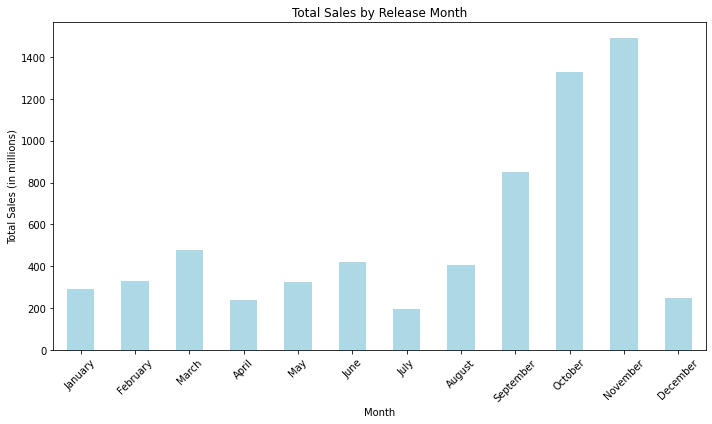

In [28]:
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

games['release_month'] = pd.to_datetime(games['release_date']).dt.month.map(month_names)

games['release_month'] = pd.Categorical(games['release_month'], categories=month_names.values(), ordered=True)

monthly_sales = games.groupby('release_month')['total_sales'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='lightblue')
plt.title('Total Sales by Release Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

The plot of total sales by release month underscores the importance of strategic release timing in the video game industry. It highlights how seasonal variations, holiday periods, and marketing efforts can influence sales outcomes. Here we can see that 3 most successful release months are November, October and September.

## Conclusion

Summing up everything above, we can make the following conclusions: <br> 
1) GTA V is the most selling game, but if we're taking into account the whole franchise, Call of Duty and FIFA are the most popular games. <br> 
2) Every region other than Japan has quite similar preferences in game genres - sports, action and shooter in order of popularity. Japan stands out with its top-1 genre being role-playing games and not having shooter in their top-5 genres at all. Although, it does have Sports genre high in their top like other regions. Misc is also a popular genre, appearing in every regions' top, as well as racing, that is missing only in Europe/Africa region.<br> 
3) The only game that had the highest scores AND the highest total sales is Red Dead Redemption in 2018. <br> 
4) The correlation between scores and total sales is quite weak, approximately 0.3 even if the outliers are removed and year bias is avoided. <br> 
5) PS series dominate in the gaming industry, taking up 54% of the shares of total sales. Despite that fact, overall XBox has the highest share of 15.7% of total sales. <br> 
6) The highest sales are made in autumn/fall, November, october and September being the top-3 months by total sales. All other seasons have significantly lower figures in term of total sales. <br> 
To conclude, we performed a lot of analysis to figure out what was the "best game(s)"and what affects sales the most. We can assume that consoles and released month might actually have higher impact on total sales than critics score. In terms of "best game(s)", there are a lot of ways to measure it, in terms of sales it's GTA V, in terms of franchise popularity it's Call of Duty and FIFA, a game that gained most popularity despite not being a part of any series - Minecraft, if we look for a game with both highest critic score and total sales - it's Red Dead Redemption.

---

## Evaluation form (Keep it!)

| Project part | Mark     | Comment   
|:-------:|:--------:|:----------------------
| Introduction       |   5/5    |     To get full pint, you need to give brief background of your project and why it is interesting for you. 
| Data description       |   5/5    | To get full point, you provide description of your dataset, namely columns.
| Research questions       |   5/5    | To get full point, you need to create at least 5 good, different, interseting questions. 
| Data prepartion       |   20/20    | To get full point, you need to show proficient skill in using pandas in the purpose of data preparation. 
| Data analysis and visualisation       |   30/30    | To get full point, you need to show proficient skill in using matplotlib or seaborn (or other libraries along with some pandas in the purpose of data visualisation and analysis. Also, you should commment all your graphs.
| Conclusion       |   5/5    | To get full point, you need to write summary of your finding in general.
| Structure and code       |   10/10    | To get full point, you need to write efficient code, and all the libraries should be properly used. Also, the whole project should be well structured. 
| Defense      |   20/20    | To get full point, students should properly present their projects during the defense and be able to answer questions from instructor.
| ML modelling       |   10/10 (bonus)    | 
|**Total**|**100/100**  | 
